<a href="https://colab.research.google.com/github/JiyeaAn/Prediction-Model/blob/main/AutoML_Predict_Customer_Churn_with_Python_and_Machine_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
!pip install pycaret
from pycaret.utils import version
version()
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip3 install numpy==1.21.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://pycaret.gitbook.io/docs/

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
cleanDF = df.drop('customerID', axis=1)

In [ ]:
for column in cleanDF.columns:
  if cleanDF[column].dtype == np.number:
    continue
  cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])

https://pycaret.gitbook.io/docs/get-started/preprocessing/data-preparation

In [ ]:
from pycaret.classification import *

s = setup(data = cleanDF, target = 'Churn', session_id=123
          , normalize = True
          , normalize_method = 'minmax'
 #         , ignore_features = ['customerID']
          , train_size=0.8
          , numeric_features = ['tenure','TotalCharges','MonthlyCharges']
          , categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
          , use_gpu = True
          , transformation = True
          , ignore_low_variance = True
          , remove_multicollinearity = True)
          , multicollinearity_threshold = 0.95)

,Description,Value
0,session_id,123
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7043, 20)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['gender',
                                                            'SeniorCitizen',
                                                            'Partner',
                                                            'Dependents',
                                                            'PhoneService',
                                                            'MultipleLines',
                                                            'InternetService',
                                                            'OnlineSecurity',
                                                            'OnlineBackup',
                                                            'DeviceProtection',
                                                            'TechSupport',
     

In [ ]:
models()

INFO:logs:gpu_param set to True


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8044,0.8445,0.5228,0.6599,0.5830,0.4576,0.4631,0.099
ridge,Ridge Classifier,0.8021,0.0000,0.4909,0.6655,0.5647,0.4405,0.4492,0.048
gbc,Gradient Boosting Classifier,0.8012,0.8460,0.5105,0.6549,0.5733,0.4464,0.4525,0.917
ada,Ada Boost Classifier,0.8010,0.8455,0.5180,0.6511,0.5766,0.4488,0.4541,0.319
lightgbm,Light Gradient Boosting Machine,0.7996,0.8369,0.5126,0.6479,0.5719,0.4436,0.4490,0.124
lda,Linear Discriminant Analysis,0.7987,0.8406,0.5377,0.6378,0.5829,0.4516,0.4548,0.114
rf,Random Forest Classifier,0.7911,0.8170,0.4739,0.6363,0.5428,0.4112,0.4190,1.210
svm,SVM - Linear Kernel,0.7890,0.0000,0.4404,0.7053,0.4848,0.3752,0.4013,0.070
et,Extra Trees Classifier,0.7717,0.7843,0.4624,0.5811,0.5145,0.3679,0.3723,1.371
knn,K Neighbors Classifier,0.7659,0.7740,0.5017,0.5592,0.5285,0.3735,0.3747,0.434


INFO:logs:create_model_container: 42
INFO:logs:master_model_container: 42
INFO:logs:display_container: 4
INFO:logs:[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,


In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7730,0.8184,0.4595,0.5862,0.5152,0.3698,0.3745
1,0.7979,0.8356,0.4932,0.6518,0.5615,0.4335,0.4406
2,0.8209,0.8555,0.5676,0.6942,0.6245,0.5085,0.5130
3,0.8032,0.8530,0.5068,0.6637,0.5747,0.4497,0.4566
4,0.8099,0.8533,0.5068,0.6881,0.5837,0.4642,0.4733
5,0.7904,0.8265,0.5374,0.6124,0.5725,0.4344,0.4360
6,0.8171,0.8585,0.5714,0.6774,0.6199,0.5006,0.5037
7,0.8046,0.8516,0.4966,0.6697,0.5703,0.4475,0.4558
8,0.8117,0.8371,0.5374,0.6752,0.5985,0.4776,0.4829


INFO:logs:create_model_container: 43
INFO:logs:master_model_container: 43
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_lr = tune_model(lr, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7730,0.8185,0.4595,0.5862,0.5152,0.3698,0.3745
1,0.7979,0.8354,0.4932,0.6518,0.5615,0.4335,0.4406
2,0.8209,0.8554,0.5676,0.6942,0.6245,0.5085,0.5130
3,0.8014,0.8525,0.5068,0.6579,0.5725,0.4460,0.4525
4,0.8099,0.8533,0.5068,0.6881,0.5837,0.4642,0.4733
5,0.7904,0.8265,0.5374,0.6124,0.5725,0.4344,0.4360
6,0.8188,0.8585,0.5714,0.6829,0.6222,0.5043,0.5078
7,0.8028,0.8514,0.4898,0.6667,0.5647,0.4411,0.4499
8,0.8099,0.8372,0.5306,0.6724,0.5932,0.4714,0.4770


INFO:logs:create_model_container: 46
INFO:logs:master_model_container: 46
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


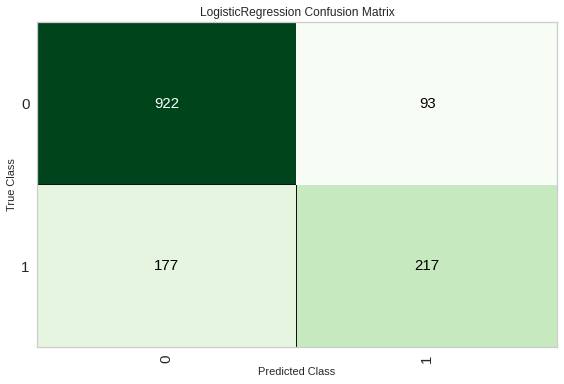

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lr, 'confusion_matrix')